In [13]:
# FEATURE MATCHING USING SIFT MATCHER

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def display(image, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')

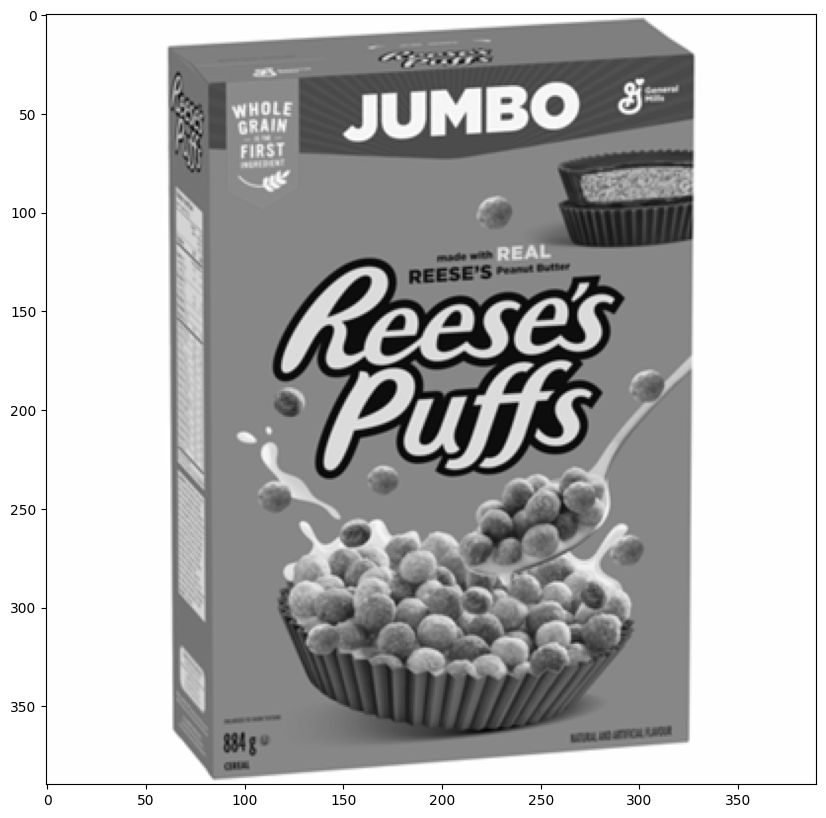

In [15]:
reeses = cv2.imread('/home/srijanani/GIT/OpenCV/Images/reeses.png', 0)

display(reeses, cmap='gray')

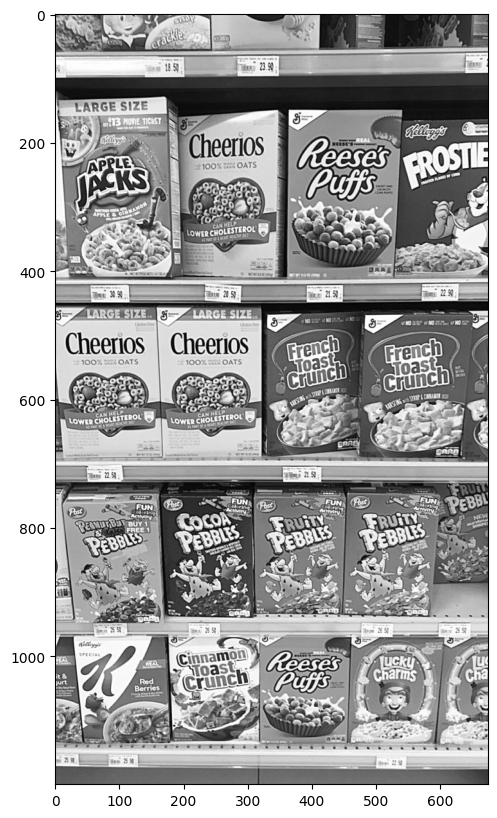

In [16]:
cereals = cv2.imread('/home/srijanani/GIT/OpenCV/Images/cereals.jpg', 0)

display(cereals, cmap='gray')

In [17]:
sift = cv2.SIFT_create()

In [18]:
kp1, des1 = sift.detectAndCompute(reeses, None)

kp2, des2 = sift.detectAndCompute(cereals, None)

# kp1, des1 = sift.detectAndCompute(reeses, None)
# kp2, des2 = sift.detectAndCompute(cereals, None)


In [20]:
bf = cv2.BFMatcher()

In [21]:
des1

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 7., 27., 51., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [35., 78.,  0., ...,  0.,  0.,  0.],
       [27.,  8.,  3., ...,  0.,  0.,  0.]], dtype=float32)

In [22]:
matcher = bf.knnMatch(des1, des2, k=2)

In [30]:
len(matcher)

921

In [25]:
good = []

In [48]:
# LESS DISTANCE == BETTER MATCH

# RATIO MATCH1 < 75% MATCH2

for m, n in matcher:

    # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2 DISTANCE
    # THEN DESCRIPTOR WAS GOOD MATCH, LET KEPT IT !
    
    if m.distance < 0.75 * n.distance:

        good.append([m])

In [49]:
len(good)

326

In [52]:
sift_matcher = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

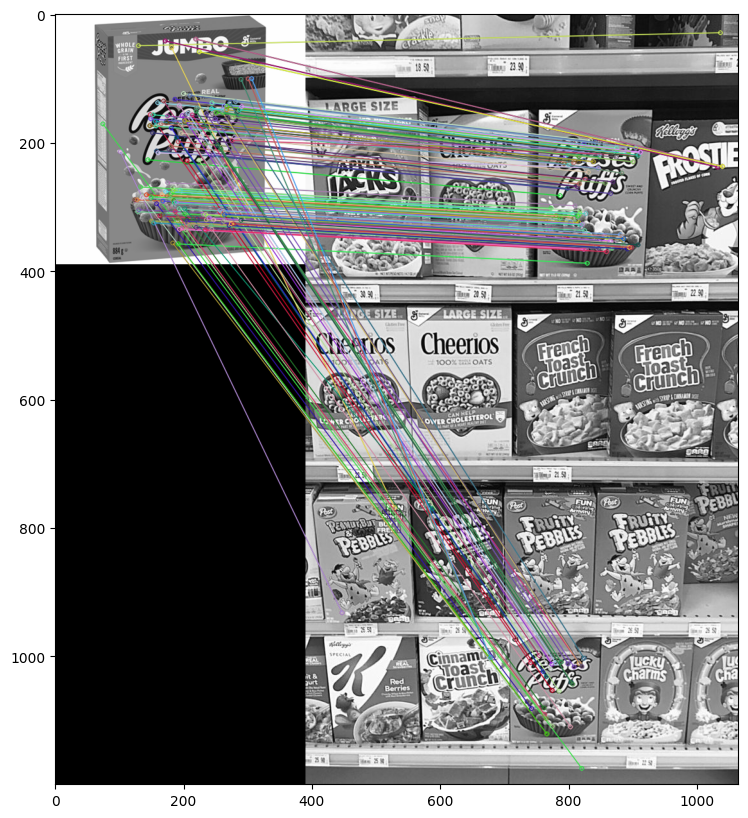

In [53]:
display(sift_matcher)